In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [386]:
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [387]:
def check_all_zero(df):
    all_zero_column=[]
    for column in energy_df:
        all_zeros_or_null = (energy_df[column] == 0) | pd.isnull(energy_df[column])
        if all_zeros_or_null.all()==True:
            all_zero_column.append(column)
    return all_zero_column

all_cero_column = check_all_zero(energy_df)

In [388]:
def drop_column(df, columns):
    return df.drop(columns, axis=1)

energy_df =drop_column(energy_df,all_cero_column)


energy_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,93.0,31.0,287.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [389]:
# focus on total load actual 
# we are looking at predicting power usage, only look at total load actually
import pandas as pd
def pre_process_totalload(df):
    df["time"] = pd.to_datetime(df["time"] ,utc=True)

    df.set_index('time', inplace=True)
    total_load_df = df[["total load actual"]]

    total_load_df["month"]= total_load_df.index.month
    total_load_df["weekday"]= total_load_df.index.weekday
    total_load_df["hour"]= total_load_df.index.hour

    total_load_df = pd.get_dummies(total_load_df, columns=['hour'], dtype=int)

    return total_load_df

total_load_df= pre_process_totalload(energy_df)


/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_63640/702637883.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["month"]= total_load_df.index.month
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_63640/702637883.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["weekday"]= total_load_df.index.weekday
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_63640/702637883.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [390]:
total_load_df

,total load actual,month,weekday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,25385.0,12,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-01-01 00:00:00+00:00,24382.0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,22734.0,1,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,21286.0,1,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,20264.0,1,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,30653.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-12-31 19:00:00+00:00,29735.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-12-31 20:00:00+00:00,28071.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [391]:
def pre_process(df):
    all_cero_column=check_all_zero(df)
    df= drop_column(df,all_cero_column)
    total_load_df=pre_process_totalload(df)
    print(total_load_df.isnull().values.any())
    return total_load_df


In [392]:
import sys
sys.executable

'/Users/silje/anaconda3/envs/tensorflow/bin/python'

In [393]:
#%pip install --upgrade --force-reinstall tensorflow

In [394]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
def build_nn_normal_model(input_shape, hidden, stddev_guess=1):
    model_in = tf.keras.Input(shape=input_shape, dtype='float32')
    x = model_in
    for h in hidden:
        x = keras.layers.Dense(h, activation='relu')(x)
    mu_logsigma = tf.keras.layers.Dense(2, activation='linear')(x)
    lf = lambda t: tfp.distributions.Normal(loc=t[:, :1], scale=tf.math.exp(t[:, 1:]))
    model_out = tfp.layers.DistributionLambda(lf)(mu_logsigma)
    model = tf.keras.Model(model_in, model_out)
    return model


In [395]:
from pydotplus import InvocationException

In [396]:
total_load_df

,total load actual,month,weekday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,25385.0,12,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-01-01 00:00:00+00:00,24382.0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,22734.0,1,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,21286.0,1,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,20264.0,1,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,30653.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-12-31 19:00:00+00:00,29735.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-12-31 20:00:00+00:00,28071.0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [397]:
from sklearn.model_selection import train_test_split
import pandas as pd
total_load_df = total_load_df.dropna()
y_df=total_load_df["total load actual"].astype('float64')
X_df=total_load_df.drop("total load actual", axis=1)

sep = '2018-01-01'
#normalize weekday and month
X_df['weekday'] = X_df['weekday'] / 6
X_df["month"] = X_df["month"]/12
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
input_shape=len(X_df.columns)

In [398]:
y_df

time
2014-12-31 23:00:00+00:00    25385.0
2015-01-01 00:00:00+00:00    24382.0
2015-01-01 01:00:00+00:00    22734.0
2015-01-01 02:00:00+00:00    21286.0
2015-01-01 03:00:00+00:00    20264.0
                              ...   
2018-12-31 18:00:00+00:00    30653.0
2018-12-31 19:00:00+00:00    29735.0
2018-12-31 20:00:00+00:00    28071.0
2018-12-31 21:00:00+00:00    25801.0
2018-12-31 22:00:00+00:00    24455.0
Name: total load actual, Length: 35028, dtype: float64

In [399]:
#Seperate training and test set
sep = '2018-01-01'
X_train = X_df[X_df.index < sep]
y_train = y_df[y_df.index < sep]
X_test = X_df[X_df.index >= sep]
y_test= y_df[y_df.index >= sep]

mean_train = y_train.mean()
std_train = y_train.std()

y_train_normalized = (y_train - mean_train) / std_train
y_test_normalized = (y_test - mean_train) / std_train




In [400]:
y_train

time
2014-12-31 23:00:00+00:00    25385.0
2015-01-01 00:00:00+00:00    24382.0
2015-01-01 01:00:00+00:00    22734.0
2015-01-01 02:00:00+00:00    21286.0
2015-01-01 03:00:00+00:00    20264.0
                              ...   
2017-12-31 19:00:00+00:00    28666.0
2017-12-31 20:00:00+00:00    27260.0
2017-12-31 21:00:00+00:00    25043.0
2017-12-31 22:00:00+00:00    23680.0
2017-12-31 23:00:00+00:00    22779.0
Name: total load actual, Length: 26271, dtype: float64

In [401]:

from util.neuralprobabilistic import train_nn_model
from tensorflow import keras


# Define the neural network architecture
model_in = tf.keras.Input(shape=input_shape, dtype=tf.float32)
x=model_in
#x = tf.keras.layers.Dense(hidden_neurons, activation='relu')(model_in)
mu_logsigma = tf.keras.layers.Dense(2, activation='linear')(x)
# Define a lambda function for the distribution
lf = lambda t: tfp.distributions.Normal(loc=t[:, :1], scale=tf.math.exp(t[:, 1:]))

# Create the output layer using DistributionLambda
model_out = tfp.layers.DistributionLambda(lf)(mu_logsigma)

# Create the probabilistic neural network model
model = tf.keras.Model(model_in, model_out)


keras.utils.plot_model(model, show_shapes=True,show_layer_names=True, rankdir='LR', show_layer_activations=True)
plt.show()


In [402]:
def custom_loss(y_true, dist):
    # Extract mean and standard deviation from the distribution
    mean = dist.loc
    std = dist.scale

    # Adjust the scale parameter as needed
    scaled_std = std * 0.1

    # Calculate the negative log-likelihood
    negloglik = -tfp.distributions.Normal(mean, std).log_prob(y_true)

    return tf.reduce_mean(negloglik)


# Compile the model with a suitable loss function

#This gave way to large values
negloglikelihood = lambda y_true, dist: -dist.log_prob(y_true)*0.1
model.compile(optimizer='adam', loss=negloglikelihood)

# Train the model
history = model.fit(X_train, y_train_normalized, epochs=100, batch_size=42,validation_split=0.0, verbose=True)
print(history.history)
# Fun

#model = build_nn_normal_model(input_shape=(35064, 3), hidden=2)

#Choose Mean Squared Error (MSE): Suitable for continuous values. It penalizes larger errors more heavily.
#look into fit_params
#history = train_nn_model(model = model, X=X, y=y, loss="mean_squared_error")

Epoch 1/100


626/626 [==============================] - 0s 393us/step - loss: 0.1387
Epoch 2/100
626/626 [==============================] - 0s 354us/step - loss: 0.1134
Epoch 3/100
626/626 [==============================] - 0s 366us/step - loss: 0.0987
Epoch 4/100
626/626 [==============================] - 0s 383us/step - loss: 0.0944
Epoch 5/100
626/626 [==============================] - 0s 357us/step - loss: 0.0938
Epoch 6/100
626/626 [==============================] - 0s 361us/step - loss: 0.0937
Epoch 7/100
626/626 [==============================] - 0s 423us/step - loss: 0.0937
Epoch 8/100
626/626 [==============================] - 0s 414us/step - loss: 0.0937
Epoch 9/100
626/626 [==============================] - 0s 437us/step - loss: 0.0937
Epoch 10/100
626/626 [==============================] - 0s 364us/step - loss: 0.0937
Epoch 11/100
626/626 [==============================] - 0s 380us/step - loss: 0.0937
Epoch 12/100
626/626 [==============================] - 0s 384us/step - loss: 0.0937
E

In [403]:
print(model)
print(history)

train_loss = history.history['loss']
#val_loss = history.history['val_loss']

print(train_loss)
print(history.history)

[0.13872438669204712, 0.11335718631744385, 0.09874273836612701, 0.09438800066709518, 0.09382098913192749, 0.09372180700302124, 0.09369565546512604, 0.09371025115251541, 0.09370765835046768, 0.09370773285627365, 0.09368883818387985, 0.09369216114282608, 0.0936983972787857, 0.09371024370193481, 0.09370364248752594, 0.09369215369224548, 0.093692347407341, 0.09369845688343048, 0.09370758384466171, 0.0936800017952919, 0.09370371699333191, 0.09370853751897812, 0.09369880706071854, 0.09369340538978577, 0.09368827193975449, 0.09370080381631851, 0.09370148926973343, 0.0936889499425888, 0.0936935544013977, 0.09370121359825134, 0.09369351714849472, 0.0936790406703949, 0.09366953372955322, 0.09368705749511719, 0.09369531273841858, 0.09369874000549316, 0.09369971603155136, 0.09369675070047379, 0.09370187669992447, 0.09369640052318573, 0.09370505064725876, 0.09369522333145142, 0.09370420128107071, 0.09369321912527084, 0.0936947837471962, 0.09370294958353043, 0.09369561076164246, 0.09369566291570663,

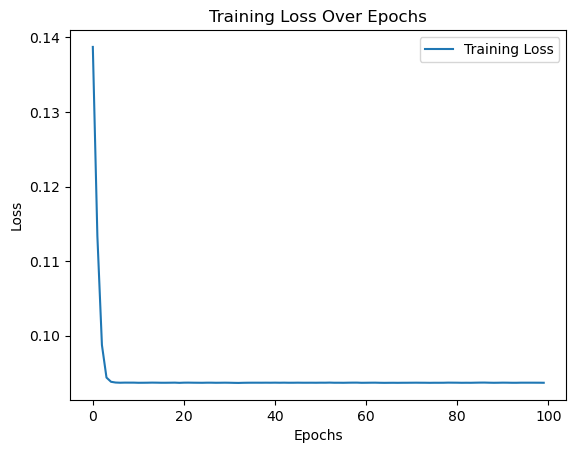

In [404]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


112/274 [===========>..................] - ETA: 0s 

274/274 [==============================] - 0s 491us/step


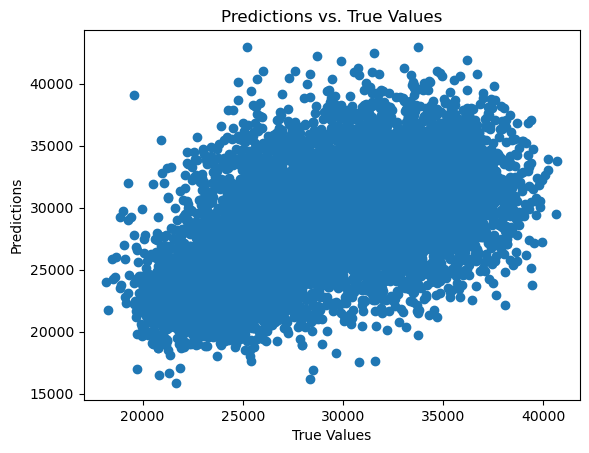

[[26808.814]
 [23671.57 ]
 [23885.514]
 ...
 [29488.363]
 [31794.291]
 [27603.812]]


In [405]:
predictions = model.predict(X_test)
# Apply inverse transformation to bring predictions back to original scale
predictions = predictions * std_train + mean_train

# Plot predictions vs. targets
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.show()
#util.plot_pred_scatter(y_test, ts_pred, figsize=figsize)
print(predictions)

In [406]:
# Create a DataFrame with the index of X_test
result_df = pd.DataFrame(index=y_test.index)

# Add columns for predictions and true values
result_df['predictions'] = predictions.flatten()  # Flatten the predictions array
result_df['true_values'] = y_test.values #

In [407]:
result_df

,predictions,true_values
time,,
2018-01-01 00:00:00+00:00,26808.814453,22009.0
2018-01-01 01:00:00+00:00,23671.570312,20589.0
2018-01-01 02:00:00+00:00,23885.513672,19547.0
2018-01-01 03:00:00+00:00,23508.212891,18871.0
2018-01-01 04:00:00+00:00,25974.511719,18688.0
...,...,...
2018-12-31 18:00:00+00:00,37513.007812,30653.0
2018-12-31 19:00:00+00:00,36697.644531,29735.0
2018-12-31 20:00:00+00:00,29488.363281,28071.0


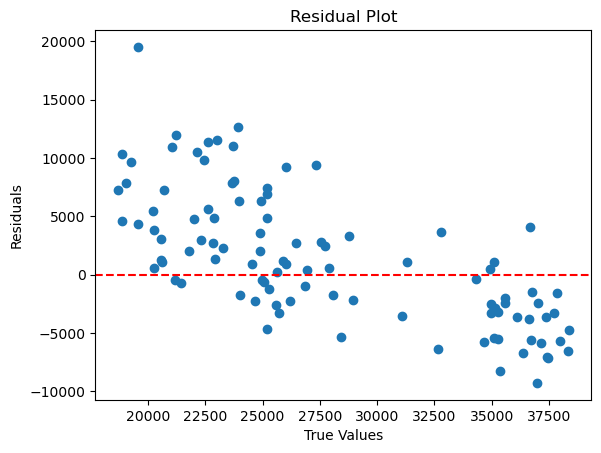

In [408]:


residuals = result_df[0:100]['predictions'] -result_df[0:100]["true_values"]
plt.scatter(result_df[0:100]["true_values"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [409]:
print()

See that A lot of predictions are under 0, this is not the case in real life why?

DO normalization on input data
